In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r'C:\Users\Mukesh Anchuri\Franchise India - Mukesh-A 190.csv')
df

,Unnamed: 0,Company,Establishing Year,Launching Year,Minimum Investment,Maximum Investment,Outlets,Minimum Space (in sft),Headquarter
0,0,What a Sandwich,2013,2018,50 K,2 Lakh,100-200,200,Pune
1,1,Go69 Pizza,2015,2016,5 Lakh,10 Lakh,50-100,100,Lucknow
2,2,THE GRANIOS,2013,2017,2 Lakh,5 Lakh,10-20,200,khammam
3,3,CHICAGO PIZZA,2000,2007,10 Lakh,20 Lakh,100-200,100,New delhi
4,4,U.S. Pizza,1998,2002,20 Lakh,30 Lakh,50-100,250,Bangalore Urban District
...,...,...,...,...,...,...,...,...,...
455,455,SGL MINIPLEX PRIVATE LIMITED,2020,2020,50 Lakh,1 Cr,Less than 10,2000,Deharaudn
456,456,Eos Cinemas Pvt. Ltd,2013,2015,50 Lakh,1 Cr,Less than 10,2000,Bastar
457,457,ResQRoom,2016,2018,10 Lakh,20 Lakh,10-20,700,Haveli
458,458,House of Fitness pvt ltd,2012,2012,2 Cr,5 Cr,50-100,3500,Delhi


In [3]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [4]:
df

,Company,Establishing Year,Launching Year,Minimum Investment,Maximum Investment,Outlets,Minimum Space (in sft),Headquarter
0,What a Sandwich,2013,2018,50 K,2 Lakh,100-200,200,Pune
1,Go69 Pizza,2015,2016,5 Lakh,10 Lakh,50-100,100,Lucknow
2,THE GRANIOS,2013,2017,2 Lakh,5 Lakh,10-20,200,khammam
3,CHICAGO PIZZA,2000,2007,10 Lakh,20 Lakh,100-200,100,New delhi
4,U.S. Pizza,1998,2002,20 Lakh,30 Lakh,50-100,250,Bangalore Urban District
...,...,...,...,...,...,...,...,...
455,SGL MINIPLEX PRIVATE LIMITED,2020,2020,50 Lakh,1 Cr,Less than 10,2000,Deharaudn
456,Eos Cinemas Pvt. Ltd,2013,2015,50 Lakh,1 Cr,Less than 10,2000,Bastar
457,ResQRoom,2016,2018,10 Lakh,20 Lakh,10-20,700,Haveli
458,House of Fitness pvt ltd,2012,2012,2 Cr,5 Cr,50-100,3500,Delhi


In [5]:
df.isnull().sum()

Company                   0
Establishing Year         0
Launching Year            0
Minimum Investment        0
Maximum Investment        0
Outlets                   0
Minimum Space (in sft)    0
Headquarter               2
dtype: int64

In [54]:
df['Headquarter'].isnull().sum()

0

In [5]:
df['Headquarter'].fillna(df['Headquarter'].mode()[0], inplace = True)
df

,Company,Establishing Year,Launching Year,Minimum Investment,Maximum Investment,Outlets,Minimum Space (in sft),Headquarter
0,What a Sandwich,2013,2018,50 K,2 Lakh,100-200,200,Pune
1,Go69 Pizza,2015,2016,5 Lakh,10 Lakh,50-100,100,Lucknow
2,THE GRANIOS,2013,2017,2 Lakh,5 Lakh,10-20,200,khammam
3,CHICAGO PIZZA,2000,2007,10 Lakh,20 Lakh,100-200,100,New delhi
4,U.S. Pizza,1998,2002,20 Lakh,30 Lakh,50-100,250,Bangalore Urban District
...,...,...,...,...,...,...,...,...
455,SGL MINIPLEX PRIVATE LIMITED,2020,2020,50 Lakh,1 Cr,Less than 10,2000,Deharaudn
456,Eos Cinemas Pvt. Ltd,2013,2015,50 Lakh,1 Cr,Less than 10,2000,Bastar
457,ResQRoom,2016,2018,10 Lakh,20 Lakh,10-20,700,Haveli
458,House of Fitness pvt ltd,2012,2012,2 Cr,5 Cr,50-100,3500,Delhi


In [8]:
df['Minimum Space (in sft)'].value_counts()

200      57
500      40
300      38
1500     37
100      36
1000     34
150      24
800      24
250      16
400      15
2000     14
600      14
700      12
1200     12
3000     10
2500      9
5000      8
900       7
1100      5
350       5
1600      4
3500      3
4000      3
65000     3
60        2
120       2
6000      2
550       2
10000     2
1300      2
80        2
650       2
70        2
12000     1
1800      1
1330      1
01        1
1350      1
8000      1
65340     1
1700      1
850       1
450       1
None      1
750       1
Name: Minimum Space (in sft), dtype: int64

In [9]:
df['Minimum Investment'].value_counts()

  10 Lakh      125
  20 Lakh       82
  30 Lakh       63
  50 Lakh       51
  5 Lakh        48
  2 Lakh        25
  10000         21
  50 K          15
  1 Cr          11
  2 Cr          10
  5 Cr           6
  0              2
  12 Lakh        1
Name: Minimum Investment, dtype: int64

In [103]:
df['Outlets'].value_counts()

Less than 10    281
20-50            38
100-200          36
10-20            36
50-100           29
200-500          18
500-1000          6
1000-10000        4
5                 2
65                1
36                1
66                1
6                 1
12                1
215               1
0                 1
2000              1
110               1
486               1
Name: Outlets, dtype: int64

In [102]:
df['Outlets']=df['Outlets'].apply( lambda x:x.replace(' 0 ',"22"))

In [55]:
df["Minimum Space (in sft)"] = df["Minimum Space (in sft)"].replace({'None': '300'})
df

,Company,Establishing Year,Launching Year,Minimum Investment,Maximum Investment,Outlets,Minimum Space (in sft),Headquarter
0,What a Sandwich,2013,2018,50 K,2 Lakh,100-200,200,Pune
1,Go69 Pizza,2015,2016,5 Lakh,10 Lakh,50-100,100,Lucknow
2,THE GRANIOS,2013,2017,2 Lakh,5 Lakh,10-20,200,khammam
3,CHICAGO PIZZA,2000,2007,10 Lakh,20 Lakh,100-200,100,New delhi
4,U.S. Pizza,1998,2002,20 Lakh,30 Lakh,50-100,250,Bangalore Urban District
...,...,...,...,...,...,...,...,...
455,SGL MINIPLEX PRIVATE LIMITED,2020,2020,50 Lakh,1 Cr,Less than 10,2000,Deharaudn
456,Eos Cinemas Pvt. Ltd,2013,2015,50 Lakh,1 Cr,Less than 10,2000,Bastar
457,ResQRoom,2016,2018,10 Lakh,20 Lakh,10-20,700,Haveli
458,House of Fitness pvt ltd,2012,2012,2 Cr,5 Cr,50-100,3500,Delhi


In [ ]:
df["Minimum Space (in sft)"] = df["Minimum Space (in sft)"].replace({'None': '300'})
df

In [100]:
df["Outlets"] = df["Outlets"].replace({' 0 ': '12'})
df

,Company,Establishing Year,Launching Year,Minimum Investment,Maximum Investment,Outlets,Minimum Space (in sft),Headquarter
0,What a Sandwich,2013,2018,50 K,2 Lakh,100-200,200,Pune
1,Go69 Pizza,2015,2016,5 Lakh,10 Lakh,50-100,100,Lucknow
2,THE GRANIOS,2013,2017,2 Lakh,5 Lakh,10-20,200,khammam
3,CHICAGO PIZZA,2000,2007,10 Lakh,20 Lakh,100-200,100,New delhi
4,U.S. Pizza,1998,2002,20 Lakh,30 Lakh,50-100,250,Bangalore Urban District
...,...,...,...,...,...,...,...,...
455,SGL MINIPLEX PRIVATE LIMITED,2020,2020,50 Lakh,1 Cr,Less than 10,2000,Deharaudn
456,Eos Cinemas Pvt. Ltd,2013,2015,50 Lakh,1 Cr,Less than 10,2000,Bastar
457,ResQRoom,2016,2018,10 Lakh,20 Lakh,10-20,700,Haveli
458,House of Fitness pvt ltd,2012,2012,2 Cr,5 Cr,50-100,3500,Delhi


In [10]:
df['Headquarter']

0                          Pune
1                       Lucknow
2                       khammam
3                     New delhi
4      Bangalore Urban District
                 ...           
455                   Deharaudn
456                      Bastar
457                      Haveli
458                       Delhi
459                     Gurgaon
Name: Headquarter, Length: 460, dtype: object

In [11]:
df["Minimum Space (in sft)"] = df["Minimum Space (in sft)"].replace({'None': '300'})
df

,Company,Establishing Year,Launching Year,Minimum Investment,Maximum Investment,Outlets,Minimum Space (in sft),Headquarter
0,What a Sandwich,2013,2018,50 K,2 Lakh,100-200,200,Pune
1,Go69 Pizza,2015,2016,5 Lakh,10 Lakh,50-100,100,Lucknow
2,THE GRANIOS,2013,2017,2 Lakh,5 Lakh,10-20,200,khammam
3,CHICAGO PIZZA,2000,2007,10 Lakh,20 Lakh,100-200,100,New delhi
4,U.S. Pizza,1998,2002,20 Lakh,30 Lakh,50-100,250,Bangalore Urban District
...,...,...,...,...,...,...,...,...
455,SGL MINIPLEX PRIVATE LIMITED,2020,2020,50 Lakh,1 Cr,Less than 10,2000,Deharaudn
456,Eos Cinemas Pvt. Ltd,2013,2015,50 Lakh,1 Cr,Less than 10,2000,Bastar
457,ResQRoom,2016,2018,10 Lakh,20 Lakh,10-20,700,Haveli
458,House of Fitness pvt ltd,2012,2012,2 Cr,5 Cr,50-100,3500,Delhi


In [12]:
df.value_counts()

Company              Establishing Year  Launching Year  Minimum Investment  Maximum Investment  Outlets       Minimum Space (in sft)  Headquarter
10 DOWNING STREET    1992               2020              2 Cr               5 Cr               Less than 10  5000                    Hyderabad      1
Peet’s Coffee, Inc.  1966               2022              10000              50 K               Less than 10  100                     Delhi          1
Pearls Montessori    2012               2021              30 Lakh            50 Lakh            Less than 10  3500                    Bangalore      1
Patna Foodies        2018               2022              10 Lakh            20 Lakh            Less than 10  200                     Patna sadar    1
Pao Jee              2011               2022              20 Lakh            30 Lakh            Less than 10  200                     Chandigarh     1
                                                                                                   

In [13]:
df

,Company,Establishing Year,Launching Year,Minimum Investment,Maximum Investment,Outlets,Minimum Space (in sft),Headquarter
0,What a Sandwich,2013,2018,50 K,2 Lakh,100-200,200,Pune
1,Go69 Pizza,2015,2016,5 Lakh,10 Lakh,50-100,100,Lucknow
2,THE GRANIOS,2013,2017,2 Lakh,5 Lakh,10-20,200,khammam
3,CHICAGO PIZZA,2000,2007,10 Lakh,20 Lakh,100-200,100,New delhi
4,U.S. Pizza,1998,2002,20 Lakh,30 Lakh,50-100,250,Bangalore Urban District
...,...,...,...,...,...,...,...,...
455,SGL MINIPLEX PRIVATE LIMITED,2020,2020,50 Lakh,1 Cr,Less than 10,2000,Deharaudn
456,Eos Cinemas Pvt. Ltd,2013,2015,50 Lakh,1 Cr,Less than 10,2000,Bastar
457,ResQRoom,2016,2018,10 Lakh,20 Lakh,10-20,700,Haveli
458,House of Fitness pvt ltd,2012,2012,2 Cr,5 Cr,50-100,3500,Delhi


# Visualization

### Countplot

(array([0, 1, 2]), [Text(0, 0, '200'), Text(1, 0, '100'), Text(2, 0, '250')])

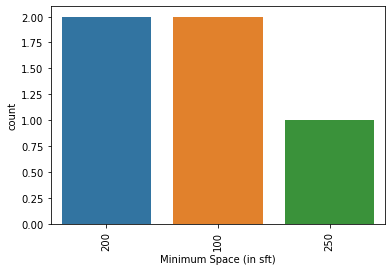

In [14]:
sns.countplot( data = df, x = df['Minimum Space (in sft)'].head())
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, '200'),
  Text(1, 0, '100'),
  Text(2, 0, '250'),
  Text(3, 0, '1000'),
  Text(4, 0, '1200'),
  Text(5, 0, '300'),
  Text(6, 0, '150'),
  Text(7, 0, '800'),
  Text(8, 0, '70'),
  Text(9, 0, '500'),
  Text(10, 0, '400'),
  Text(11, 0, '1500'),
  Text(12, 0, '3500'),
  Text(13, 0, '1700'),
  Text(14, 0, '2000'),
  Text(15, 0, '5000'),
  Text(16, 0, '2500'),
  Text(17, 0, '650'),
  Text(18, 0, '350'),
  Text(19, 0, '900'),
  Text(20, 0, '1350'),
  Text(21, 0, '700'),
  Text(22, 0, '1300'),
  Text(23, 0, '4000'),
  Text(24, 0, '1800'),
  Text(25, 0, '3000'),
  Text(26, 0, '12000'),
  Text(27, 0, '80'),
  Text(28, 0, '600'),
  Text(29, 0, '60'),
  Text(30, 0, '550'),
  Text(31, 0, '6000'),
  Text(32, 0, '120'),
  Text(33, 0, '1330'),
  Text(34, 0, '01'),
  Text(35, 0, '10000'),
 

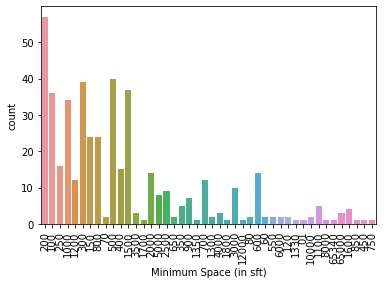

In [15]:
sns.countplot( data = df, x = df['Minimum Space (in sft)'])
plt.xticks(rotation = 90)

### Pie Chart

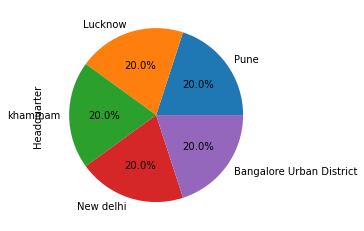

In [16]:
df["Headquarter"].head(5).value_counts().plot.pie(autopct="%.1f%%")
plt.show()

### Histogram

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

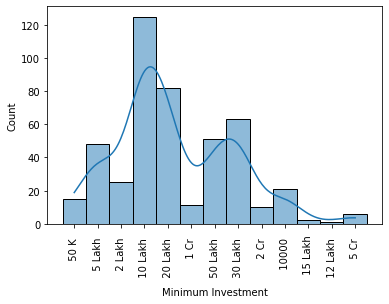

In [21]:
sns.histplot(df['Minimum Investment'], kde = True)
plt.xticks(rotation = 90)

In [19]:
df['Minimum Investment']=df['Minimum Investment'].apply( lambda x:x.replace(' 0 ',"15 Lakh"))

In [25]:
df

,Company,Establishing Year,Launching Year,Minimum Investment,Maximum Investment,Outlets,Minimum Space (in sft),Headquarter
0,What a Sandwich,2013,2018,50 K,2 Lakh,100-200,200,Pune
1,Go69 Pizza,2015,2016,5 Lakh,10 Lakh,50-100,100,Lucknow
2,THE GRANIOS,2013,2017,2 Lakh,5 Lakh,10-20,200,khammam
3,CHICAGO PIZZA,2000,2007,10 Lakh,20 Lakh,100-200,100,New delhi
4,U.S. Pizza,1998,2002,20 Lakh,30 Lakh,50-100,250,Bangalore Urban District
...,...,...,...,...,...,...,...,...
455,SGL MINIPLEX PRIVATE LIMITED,2020,2020,50 Lakh,1 Cr,Less than 10,2000,Deharaudn
456,Eos Cinemas Pvt. Ltd,2013,2015,50 Lakh,1 Cr,Less than 10,2000,Bastar
457,ResQRoom,2016,2018,10 Lakh,20 Lakh,10-20,700,Haveli
458,House of Fitness pvt ltd,2012,2012,2 Cr,5 Cr,50-100,3500,Delhi


### Scatterplot

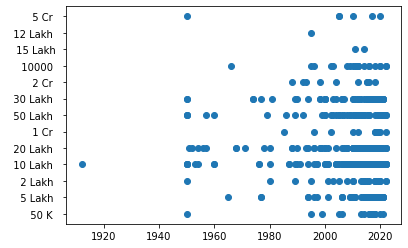

In [28]:
plt.scatter(df['Establishing Year'],df['Minimum Investment'])

<AxesSubplot:>

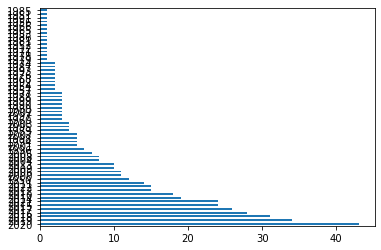

In [32]:
df['Establishing Year'].value_counts().plot(kind = 'barh')  

### Swarm Plot

C:\Users\Mukesh Anchuri\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Mukesh Anchuri\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Mukesh Anchuri\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Mukesh Anchuri\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Mukesh Anchuri\Anaconda\lib\site-packages\seaborn\categorical.p

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '100-200'),
  Text(1, 0, '50-100'),
  Text(2, 0, '10-20'),
  Text(3, 0, 'Less than 10'),
  Text(4, 0, '20-50'),
  Text(5, 0, '200-500'),
  Text(6, 0, 'No'),
  Text(7, 0, '500-1000'),
  Text(8, 0, 'More than 10000'),
  Text(9, 0, '12'),
  Text(10, 0, '1000-10000'),
  Text(11, 0, '2000'),
  Text(12, 0, '0'),
  Text(13, 0, '215'),
  Text(14, 0, '65'),
  Text(15, 0, '6'),
  Text(16, 0, '66'),
  Text(17, 0, '36'),
  Text(18, 0, '486')])

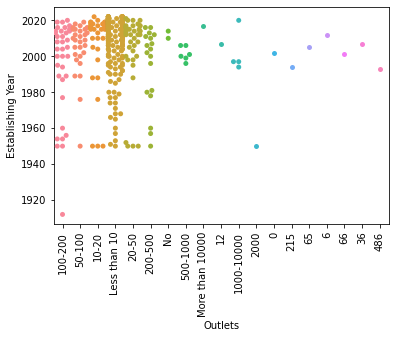

In [41]:
sns.swarmplot(y = df['Establishing Year'], x = df['Outlets'])
plt.xticks(rotation = 90)

C:\Users\Mukesh Anchuri\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Mukesh Anchuri\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Mukesh Anchuri\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Mukesh Anchuri\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Mukesh Anchuri\Anaconda\lib\site-packages\seaborn\categorical.p

<AxesSubplot:xlabel='Headquarter', ylabel='Company'>

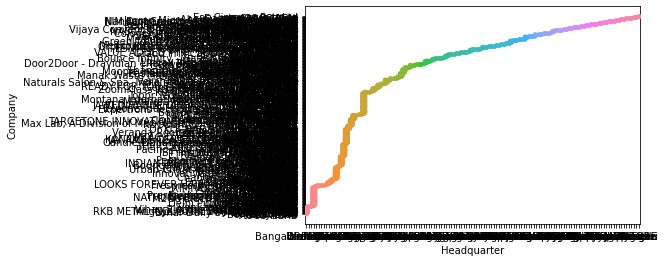

In [35]:
sns.swarmplot(y = df['Company'], x = df['Headquarter'])

### Bi - Variant Density

<AxesSubplot:xlabel='Establishing Year', ylabel='Density'>

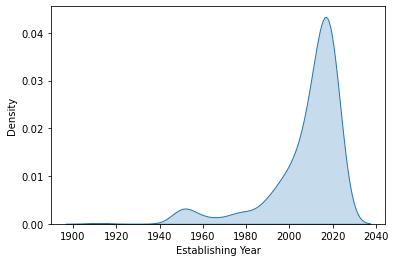

In [86]:
sns.kdeplot(data = df , x = df['Establishing Year'], shade = True) 

### Box Plot

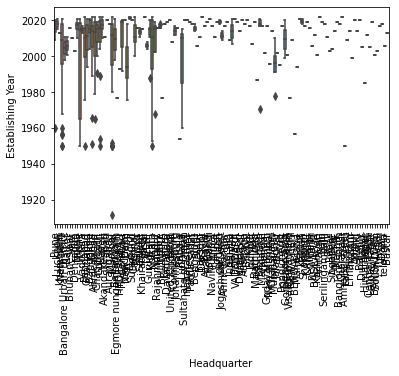

In [91]:
sns.boxplot(x = df['Headquarter'], y = df['Establishing Year'])
plt.xticks(rotation = 90)
plt.show()

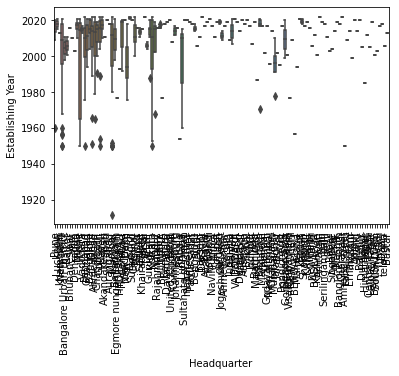

In [15]:
sns.boxplot(x = df['Headquarter'], y = df['Establishing Year'])
plt.xticks(rotation = 90)
plt.show()

### Heat Map

<AxesSubplot:>

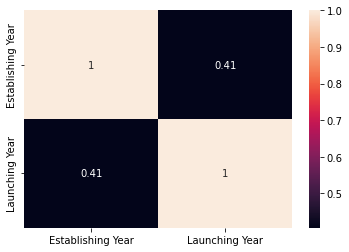

In [67]:
sns.heatmap(df.corr(), annot = True)

### ScatterPlot with Multi-Variation

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

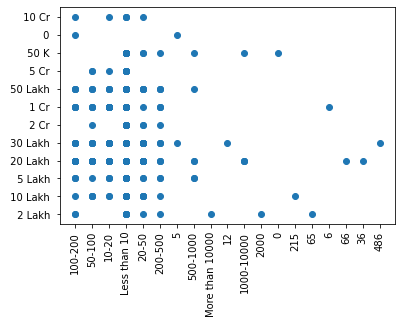

In [94]:
plt.scatter(df['Outlets'],df['Maximum Investment'])
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

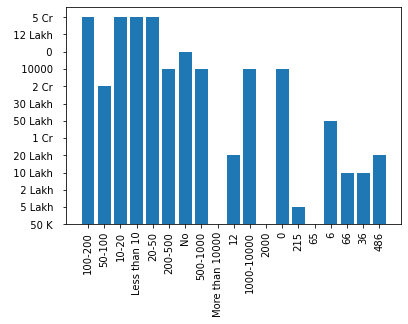

In [12]:
plt.bar(df['Outlets'],df['Minimum Investment'])
plt.xticks(rotation = 90)

In [6]:
df

,Company,Establishing Year,Launching Year,Minimum Investment,Maximum Investment,Outlets,Minimum Space (in sft),Headquarter
0,What a Sandwich,2013,2018,50 K,2 Lakh,100-200,200,Pune
1,Go69 Pizza,2015,2016,5 Lakh,10 Lakh,50-100,100,Lucknow
2,THE GRANIOS,2013,2017,2 Lakh,5 Lakh,10-20,200,khammam
3,CHICAGO PIZZA,2000,2007,10 Lakh,20 Lakh,100-200,100,New delhi
4,U.S. Pizza,1998,2002,20 Lakh,30 Lakh,50-100,250,Bangalore Urban District
...,...,...,...,...,...,...,...,...
455,SGL MINIPLEX PRIVATE LIMITED,2020,2020,50 Lakh,1 Cr,Less than 10,2000,Deharaudn
456,Eos Cinemas Pvt. Ltd,2013,2015,50 Lakh,1 Cr,Less than 10,2000,Bastar
457,ResQRoom,2016,2018,10 Lakh,20 Lakh,10-20,700,Haveli
458,House of Fitness pvt ltd,2012,2012,2 Cr,5 Cr,50-100,3500,Delhi


In [12]:
df.groupby( by = 'Headquarter')['Minimum Investment'].mean()

TypeError: Could not convert   50 Lakh    20 Lakh    50 Lakh    30 Lakh    1 Cr    20 Lakh    50 Lakh    5 Lakh    20 Lakh    20 Lakh    10000    30 Lakh    10 Lakh    20 Lakh    10 Lakh    50 Lakh    50 Lakh    20 Lakh    5 Lakh    10 Lakh    10 Lakh    30 Lakh    5 Lakh    5 Lakh    1 Cr    10 Lakh    5 Lakh    30 Lakh    50 Lakh    5 Lakh    50 K    50 Lakh    10 Lakh    1 Cr   to numeric

In [11]:
df['Minimum Investment']=df['Minimum Investment'].astype("float64")

ValueError: could not convert string to float: '  50 K  '